In [1]:
# import the necessary packages
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pyimagesearch import datasets
from pyimagesearch import models
import numpy as np
import matplotlib.pyplot as plt 

leoeop


In [2]:
channel_optir,channel_dc, y = datasets.load_data(data_path='./dataset')

  0%|          | 0/18 [00:00<?, ?it/s]

./dataset\deposition_1\optir
./dataset\deposition_1\DC


  6%|▌         | 1/18 [00:02<00:36,  2.17s/it]

./dataset\deposition_10\optir
./dataset\deposition_10\DC


 11%|█         | 2/18 [00:05<00:42,  2.65s/it]

./dataset\deposition_11\optir
./dataset\deposition_11\DC


 17%|█▋        | 3/18 [00:08<00:42,  2.82s/it]

./dataset\deposition_12\optir
./dataset\deposition_12\DC


 22%|██▏       | 4/18 [00:10<00:37,  2.71s/it]

./dataset\deposition_13\optir
./dataset\deposition_13\DC


 28%|██▊       | 5/18 [00:13<00:33,  2.60s/it]

./dataset\deposition_14\optir
./dataset\deposition_14\DC


 33%|███▎      | 6/18 [00:15<00:29,  2.42s/it]

./dataset\deposition_15\optir
./dataset\deposition_15\DC


 39%|███▉      | 7/18 [00:17<00:27,  2.50s/it]

./dataset\deposition_16\optir
./dataset\deposition_16\DC


 44%|████▍     | 8/18 [00:20<00:24,  2.40s/it]

./dataset\deposition_17\optir
./dataset\deposition_17\DC


 50%|█████     | 9/18 [00:23<00:24,  2.69s/it]

./dataset\deposition_18\optir
./dataset\deposition_18\DC


 56%|█████▌    | 10/18 [00:25<00:20,  2.62s/it]

./dataset\deposition_2\optir
./dataset\deposition_2\DC


 61%|██████    | 11/18 [00:28<00:19,  2.76s/it]

./dataset\deposition_3\optir
./dataset\deposition_3\DC


 67%|██████▋   | 12/18 [00:31<00:17,  2.85s/it]

./dataset\deposition_4\optir
./dataset\deposition_4\DC


 72%|███████▏  | 13/18 [00:34<00:13,  2.72s/it]

./dataset\deposition_5\optir
./dataset\deposition_5\DC


 78%|███████▊  | 14/18 [00:37<00:10,  2.73s/it]

./dataset\deposition_6\optir
./dataset\deposition_6\DC


 83%|████████▎ | 15/18 [00:39<00:08,  2.72s/it]

./dataset\deposition_7\optir
./dataset\deposition_7\DC


 89%|████████▉ | 16/18 [00:42<00:05,  2.79s/it]

./dataset\deposition_8\optir
./dataset\deposition_8\DC


 94%|█████████▍| 17/18 [00:46<00:03,  3.12s/it]

./dataset\deposition_9\optir
./dataset\deposition_9\DC


100%|██████████| 18/18 [00:50<00:00,  2.83s/it]


In [70]:
channel_dc[0].shape

(411, 541)

In [3]:
channel_optir= datasets.apply_mask(channel_optir)
channel_dc = datasets.apply_mask(channel_optir)




In [4]:
channel_dc = [dc/8 for dc in channel_dc]

In [5]:
channel_optir = [ir/2000 for ir in channel_optir]

In [6]:
def filter(imagen, greater_than= True, threshold= 4.1):
    filtered_images = []
    for img in imagen:
        if greater_than:
            img[:, np.all(img > threshold, axis = 0)]
        else:
            img[:, np.all(img < threshold, axis = 0)]
        
        filtered_images.append(img)
    return filtered_images

In [7]:
channel_dc[0].shape

(1500, 1500)

In [75]:
channel_optir = filter(channel_optir, greater_than=False, threshold=4)
channel_dc = filter(channel_dc, greater_than=False, threshold=6.2)


Imagen guardada como test.png


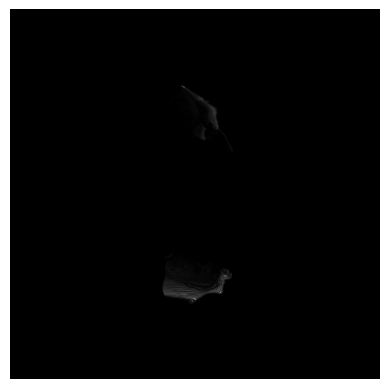

In [8]:
plt.imshow(channel_dc[6],cmap="gray")
plt.axis('off')

print("Imagen guardada como test.png")


In [9]:
X= datasets.preprocessing(channel_optir,channel_dc, height_shape=200, width_shape=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
model = models.create_cnn(200, 200, 2, regress=True)
opt = Adam( learning_rate=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_squared_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), epochs=300, batch_size=10)


[INFO] training model...
Epoch 1/300


c:\Users\Antony Cardozo\Documents\machine_learning\cnn_regression\cnn\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - loss: 625.0548 - val_loss: 650.6273
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - loss: 618.6122 - val_loss: 632.2921
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - loss: 606.6937 - val_loss: 600.7803
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - loss: 602.0793 - val_loss: 591.5565
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - loss: 598.9841 - val_loss: 586.9324
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - loss: 592.9549 - val_loss: 579.6010
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 371ms/step - loss: 596.9781 - val_loss: 573.7311
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - loss: 586.2437 - val_loss: 568.0806
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - loss: 583.8242 - val_loss: 565.2947
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - loss: 568.0089 - val_loss: 557.9893
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - loss: 576.5247 - val_loss: 553.1713
Epoch 12/300
8/8 ━━━━━━━━━━━━━━

In [11]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

[INFO] predicting house prices...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


In [15]:
print(absPercentDiff)
print(diff)
print(mean)


[ 5.46385447  4.89423616 17.7122048   7.42954527 10.7228152  12.34961423
  5.28092818 17.3697131  20.42179108 10.82183838 11.92950335 14.45368767
 15.11309624  0.41677952 11.55989387  8.76024791  7.08054701 16.85520172
 16.94565773  0.72603226  6.47330718  1.91184824  2.2619009   7.49954811
  8.70747884  5.47644297  3.76439461  1.63322796  3.98105894 12.80612212
 10.80693245  9.05077616  9.02335094 19.07815933  4.53829399 19.7470665 ]
[-1.63915634 -1.37038612 -4.95941734 -2.08027267 -3.21684456  2.71691513
  1.1618042  -4.86351967 -6.12653732 -3.24655151  2.62449074  2.89073753
  3.02261925 -0.10002708  2.54317665 -2.45286942 -1.69933128  3.37104034
  3.38913155  0.1597271  -1.42412758  0.42060661 -0.54285622 -1.94988251
 -2.61224365 -1.31434631 -0.9787426  -0.35931015 -1.1146965  -3.32959175
  2.16138649 -2.71523285 -2.34607124 -5.34188461 -1.17995644  3.9494133 ]
9.529641593394004


In [17]:
y_test


array([30, 28, 28, 28, 30, 22, 22, 28, 30, 30, 22, 20, 20, 24, 22, 28, 24,
       20, 20, 22, 22, 22, 24, 26, 30, 24, 26, 22, 28, 26, 20, 30, 26, 28,
       26, 20])